# **Resampling Datetime Data**
*   Samar KRIMI
*   16/12/2023

---

We will be working with a modified version of weather data from London from Kaggle. Along with a list of attributes and their description summaries :

  1. date - recorded date of measurement - (int)
  2. cloud_cover - cloud cover measurement in oktas - (float)
  3. sunshine - sunshine measurement in hours (hrs) - (float)
  4. global_radiation - irradiance measurement in Watt per square meter (W/m2) - (float)
  5. max_temp - maximum temperature recorded in degrees Celsius (°C) - (float)
  6. mean_temp - mean temperature in degrees Celsius (°C) - (float)
  7. min_temp - minimum temperature recorded in degrees Celsius (°C) - (float)
  8. precipitation - precipitation measurement in millimeters (mm) - (float)
  9. pressure - pressure measurement in Pascals (Pa) - (float)
  10. snow_depth - snow depth measurement in centimeters (cm) - (float)


# Part 1) Load the data and make a datetime index.

In [1]:
# Standard Import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load weather data from London
url ="https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv"
df = pd.read_csv(url)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


### 1. Convert the date column to datetime dtype

In [3]:
# convert the date column to datetime dtype
pd.to_datetime(df['date'])

0       1970-01-01 00:00:00.019790101
1       1970-01-01 00:00:00.019790102
2       1970-01-01 00:00:00.019790103
3       1970-01-01 00:00:00.019790104
4       1970-01-01 00:00:00.019790105
                     ...             
15336   1970-01-01 00:00:00.020201227
15337   1970-01-01 00:00:00.020201228
15338   1970-01-01 00:00:00.020201229
15339   1970-01-01 00:00:00.020201230
15340   1970-01-01 00:00:00.020201231
Name: date, Length: 15341, dtype: datetime64[ns]

* It does not parse dates correctly, we must correct it by entering the appropriate format!

In [4]:
# CORRECT - properly recognizes dates and does not interpret them as seconds
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['date']

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

### 2. Set the date column as the index

In [5]:
# inspect the df's new index
df = df.set_index('date')
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


In [6]:
# What type of index is it? Does it have a frequency?
df.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=15341, freq=None)

* It's a datime dtype index without frequency

### 3. Filter out only the required data

In [7]:
# keep only data from the year 2000 or later
df = df.loc['2000':, ['precipitation','max_temp', 'mean_temp', 'min_temp', 'snow_depth']]
df

,precipitation,max_temp,mean_temp,min_temp,snow_depth
date,,,,,
2000-01-01,0.0,10.8,7.0,4.9,0.0
2000-01-02,0.2,11.5,7.9,5.0,0.0
2000-01-03,6.0,9.5,9.4,7.2,0.0
2000-01-04,0.2,11.0,7.0,4.4,0.0
2000-01-05,0.8,10.8,6.4,1.9,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.5,7.6,NaN
2020-12-28,0.2,3.6,1.1,-1.3,NaN
2020-12-29,0.0,4.1,2.6,1.1,NaN


### 4. Impute any missing values.

In [8]:
# check missing values
df.isna().sum()

precipitation     390
max_temp          390
mean_temp         419
min_temp          386
snow_depth       1752
dtype: int64

In [9]:
# interpolating temperature measures
df['max_temp'] = df['max_temp'].interpolate()
df['mean_temp'] = df['mean_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()

In [10]:
# filling preciptation/snow with 0
df['precipitation'] = df['precipitation'].fillna(0)
df['snow_depth'] = df['snow_depth'].fillna(0)

In [11]:
# check remaining missing values
df.isna().sum()

precipitation    0
max_temp         0
mean_temp        0
min_temp         0
snow_depth       0
dtype: int64

# Part 2) Visualizations

In [12]:
# Import tick customization tools
import matplotlib.dates as mdates
import matplotlib.ticker as mticks

### **Q1: What month had the most precipitation between 2000 through 2010?**

In [13]:
# slice the precipitation for 2000-2010
precip_cols = ['precipitation','snow_depth']
precip_df  = df.loc["2000":"2010", precip_cols]
precip_df

,precipitation,snow_depth
date,,
2000-01-01,0.0,0.0
2000-01-02,0.2,0.0
2000-01-03,6.0,0.0
2000-01-04,0.2,0.0
2000-01-05,0.8,0.0
...,...,...
2010-12-27,5.0,1.0
2010-12-28,0.4,0.0
2010-12-29,1.4,0.0


In [14]:
# remake ts
ts = precip_df.copy()
# check the index to confirm its datetime
ts.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2010-12-22', '2010-12-23', '2010-12-24', '2010-12-25',
               '2010-12-26', '2010-12-27', '2010-12-28', '2010-12-29',
               '2010-12-30', '2010-12-31'],
              dtype='datetime64[ns]', name='date', length=4018, freq=None)

For a complete list of pandas frequency codes, The table in the "date offsets" section of the Times Series/Date functionality guide :
https://pandas.pydata.org/docs/user_guide/timeseries.html#dateoffset-objects

In [15]:
# resample the data as Monthly frequency : Downsampling reduces the sampling rate going from daily to monthly
# "MS" : MonthBegin
# find the date and corresponding value for the max precipitation
ts_MS_res = ts.resample("MS").max().copy()
ts_MS_res.name = 'Resampled'
ts_MS_res

,precipitation,snow_depth
date,,
2000-01-01,6.0,0.0
2000-02-01,16.8,0.0
2000-03-01,7.2,0.0
2000-04-01,17.2,0.0
2000-05-01,19.0,0.0
...,...,...
2010-08-01,20.6,0.0
2010-09-01,9.8,0.0
2010-10-01,21.8,0.0


In [16]:
# check the index to confirm the current freq
ts_MS_res.index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2010-03-01', '2010-04-01', '2010-05-01', '2010-06-01',
               '2010-07-01', '2010-08-01', '2010-09-01', '2010-10-01',
               '2010-11-01', '2010-12-01'],
              dtype='datetime64[ns]', name='date', length=132, freq='MS')

In [17]:
# find the dates for the max precipitation
date_max_precip = ts_MS_res.idxmax()
date_max_precip

precipitation   2000-10-01
snow_depth      2009-02-01
dtype: datetime64[ns]

In [18]:
# find the corresponding values for the max precipitation
max_precip = ts_MS_res.max()
max_precip

precipitation    36.6
snow_depth       12.0
dtype: float64

"The highest daily precipitation of {max preciptation} inches occurred on {date as "MonthName 2-digit-day, 4-digit year. } which was a {day of the week}."

In [19]:
# determine the date and value for the most precipitation (the max 'precipitation')
print(f"The highest preciptation is {max_precip[0]} inches, which occured on {date_max_precip[0].strftime('%B %d, %Y')} which was a {date_max_precip[0].day_name()}.")
# determine the date and value for the most precipitation (the max 'snow_depth')
print(f"The highest snow_depth is {max_precip[1]} inches, which occured on {date_max_precip[1].strftime('%B %d, %Y')} which was a {date_max_precip[1].day_name()}.")

The highest preciptation is 36.6 inches, which occured on October 01, 2000 which was a Sunday.
The highest snow_depth is 12.0 inches, which occured on February 01, 2009 which was a Sunday.


## Q1. Visualization Requirements

In [20]:
## creating our tick locators and formatters
## customize major ticks
# create the locator to place ticks every 1 year
major_loc= mdates.YearLocator(1)
major_fmt = mdates.DateFormatter("%Y")
## customize minor ticks
# create the locator to place ticks every 3 months
minor_loc = mdates.MonthLocator(interval=3)
minor_fmt = mdates.DateFormatter("%b")

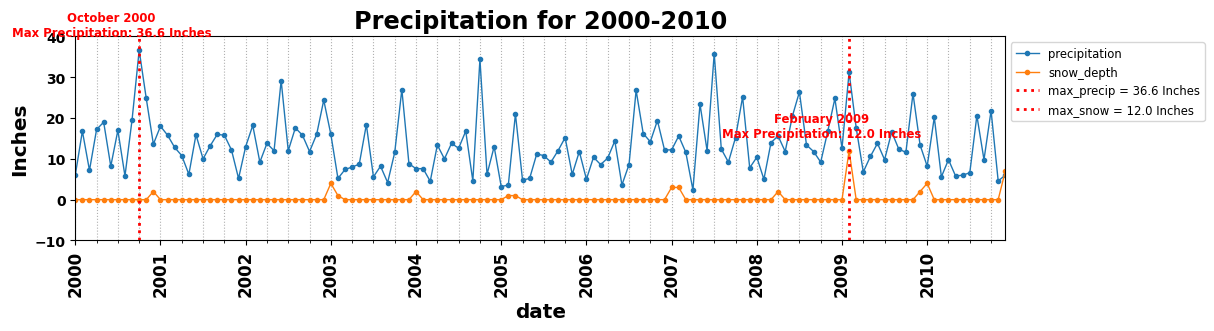

In [21]:
# Plot the feature and time period that corresponds to the most precipitation between 2000 through 2010
fig, ax = plt.subplots(figsize=(12,3))
ts_MS_res.plot(ax=ax, marker='.', lw=1)

ax.set_title(label='Precipitation for 2000-2010', fontsize='xx-large', fontweight='semibold')
#ax.set_xlabel('Date', fontsize='x-large', fontweight='semibold')
ax.set_ylabel(ylabel='Inches', fontsize='x-large', fontweight='semibold')

##  Set xticks and xticklables
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize='large', fontweight='semibold')

##  Set yticks and yticklables
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticklabels(), fontsize='medium', fontweight='semibold')

## Increasing axis label font sizes
ax.set_xlabel(ax.xaxis.get_label().get_text(), fontsize='x-large', fontweight='semibold')
ax.set_ylabel(ax.yaxis.get_label().get_text(), fontsize='x-large', fontweight='semibold')

## Making major/minor gridlines visually distinct
ax.grid(which='both', axis='x', ls=":")

## Final xdate tweaks
fig = ax.get_figure()
fig.autofmt_xdate(rotation=90, ha='center')

# Add vertical line at the dates of maximum precipitation
ax.axvline(date_max_precip[0], color='red', lw=2, ls=':', label=f'max_precip = {max_precip[0]:.1f} Inches')
ax.axvline(date_max_precip[1], color='red', lw=2, ls=':', label=f'max_snow = {max_precip[1]:.1f} Inches')

# Display the legend
ax.legend(fontsize='small', bbox_to_anchor=[1,1])

# Annotate the vertical line with the dates and max precipitation values
ax.annotate(f"{date_max_precip[0].strftime('%B %Y')}\nMax Precipitation: {max_precip[0]:.1f} Inches",
            xy=(date_max_precip[0], max_precip[0]), xytext=(-20, 10),
            textcoords='offset points', ha='center', fontsize='small', color='red', fontweight='semibold')

# Annotate the vertical line with the dates and max precipitation values
ax.annotate(f"{date_max_precip[1].strftime('%B %Y')}\nMax Precipitation: {max_precip[1]:.1f} Inches",
            xy=(date_max_precip[1], max_precip[1]), xytext=(-20, 10),
            textcoords='offset points', ha='center', fontsize='small', color='red', fontweight='semibold');

# Show the plot
plt.show()

### **Q2: Which year between 2000-2020 had the coolest average temperature?**

In [22]:
# slice the average temperature for 2000-2020
temp_cols = ['min_temp','mean_temp', 'max_temp']
temp_df  = df.loc["2000":"2020", temp_cols]
temp_df

,min_temp,mean_temp,max_temp
date,,,
2000-01-01,4.9,7.0,10.8
2000-01-02,5.0,7.9,11.5
2000-01-03,7.2,9.4,9.5
2000-01-04,4.4,7.0,11.0
2000-01-05,1.9,6.4,10.8
...,...,...,...
2020-12-27,7.6,7.5,7.5
2020-12-28,-1.3,1.1,3.6
2020-12-29,1.1,2.6,4.1


In [23]:
# remake ts
ts = temp_df.copy()
# check the index to confirm its datetime
ts.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=7671, freq=None)

In [24]:
# resample the data as Year frequency : Downsampling reduces the sampling rate going from daily to yearly
# "Y" : YearEnd
# find the date and corresponding value for the mean temperature
ts_Y_res = ts.resample("Y").mean().copy()
ts_Y_res.name = 'Resampled'
ts_Y_res

,min_temp,mean_temp,max_temp
date,,,
2000-12-31,8.001503,11.575683,15.144672
2001-12-31,7.647397,11.331507,15.036575
2002-12-31,8.425890,12.084247,15.815205
2003-12-31,7.895890,12.114521,16.360274
2004-12-31,8.234563,11.900683,15.549044
2005-12-31,7.973562,11.822877,15.676849
2006-12-31,8.506301,12.290822,16.152055
2007-12-31,8.120137,11.944384,15.814932
2008-12-31,7.568852,11.326776,15.156831


In [25]:
# check the index to confirm the current freq
ts_Y_res.index

DatetimeIndex(['2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31'],
              dtype='datetime64[ns]', name='date', freq='A-DEC')

In [26]:
# find the dates for the coolest average temperature
cool_year = ts_Y_res.idxmin()
cool_year

min_temp    2010-12-31
mean_temp   2010-12-31
max_temp    2010-12-31
dtype: datetime64[ns]

In [27]:
# find the corresponding values for the average temperature
mean_temperature = ts_Y_res.mean()
mean_temperature

min_temp      8.001585
mean_temp    11.903179
max_temp     15.812586
dtype: float64

"The coolest average temperature of {mean temperature} Celsius occurred on {date as "MonthName 2-digit-day, 4-digit year. } which was a {day of the week}."

In [28]:
# determine the date and value for the coolest average temperature
print(f"The coolest average temperature is {mean_temperature[0]:.1f} Celsius, which occured on {cool_year[0].strftime('%B %d, %Y')} which was a {cool_year[0].day_name()}.")
print(f"The coolest average temperature is {mean_temperature[1]:.1f} Celsius, which occured on {cool_year[1].strftime('%B %d, %Y')} which was a {cool_year[1].day_name()}.")
print(f"The coolest average temperature is {mean_temperature[2]:.1f} Celsius, which occured on {cool_year[2].strftime('%B %d, %Y')} which was a {cool_year[2].day_name()}.")

The coolest average temperature is 8.0 Celsius, which occured on December 31, 2010 which was a Friday.
The coolest average temperature is 11.9 Celsius, which occured on December 31, 2010 which was a Friday.
The coolest average temperature is 15.8 Celsius, which occured on December 31, 2010 which was a Friday.


## Q2. Visualization Requirements

In [29]:
## creating our tick locators and formatters
## customize major ticks
# create the locator to place ticks every 5 years
major_loc= mdates.YearLocator(5)
major_fmt = mdates.DateFormatter("%Y")
## customize minor ticks
# create the locator to place ticks every 1 year
minor_loc = mdates.YearLocator(1)
minor_fmt = mdates.DateFormatter("%Y")

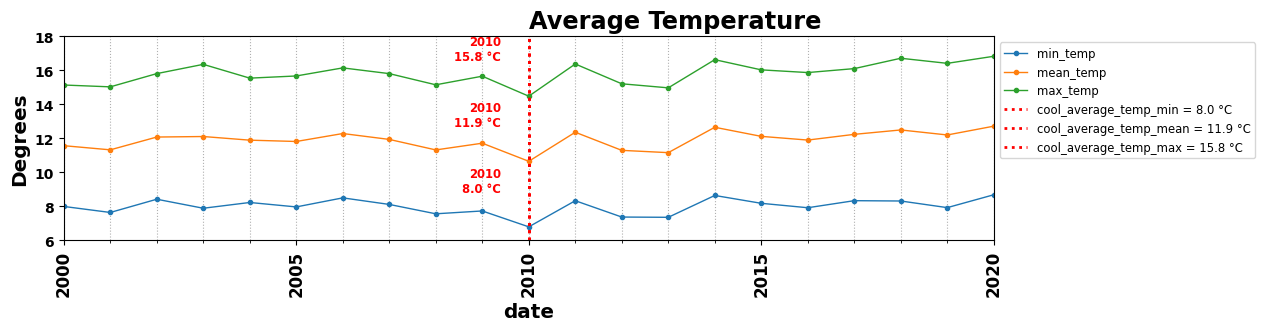

In [30]:
# Plot the feature and time period that corresponds to the coolest average temperature between 2000 through 2020
fig, ax = plt.subplots(figsize=(12,3))
ts_Y_res.plot(ax=ax, marker='.', lw=1)

ax.set_title(label='Average Temperature', fontsize='xx-large', fontweight='semibold', ha='left')
#ax.set_xlabel('Date', fontsize='x-large', fontweight='semibold')
ax.set_ylabel(ylabel='Degrees', fontsize='x-large', fontweight='semibold')

##  Set xticks and xticklables
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize='large', fontweight='semibold')

##  Set yticks and yticklables
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticklabels(), fontsize='medium', fontweight='semibold')

## Increasing axis label font sizes
ax.set_xlabel(ax.xaxis.get_label().get_text(), fontsize='x-large', fontweight='semibold')
ax.set_ylabel(ax.yaxis.get_label().get_text(), fontsize='x-large', fontweight='semibold')

## Making major/minor gridlines visually distinct
ax.grid(which='both', axis='x', ls=":")

## Final xdate tweaks
fig = ax.get_figure()
fig.autofmt_xdate(rotation=90, ha='center')

# Add vertical line at the date of mean temperature
ax.axvline(cool_year[0], color='red', lw=2, ls=':', label=f'cool_average_temp_min = {mean_temperature[0]:.1f} °C')
ax.axvline(cool_year[1], color='red', lw=2, ls=':', label=f'cool_average_temp_mean = {mean_temperature[1]:.1f} °C')
ax.axvline(cool_year[2], color='red', lw=2, ls=':', label=f'cool_average_temp_max = {mean_temperature[2]:.1f} °C')

# Display the legend
ax.legend(fontsize='small', bbox_to_anchor=[1,1])

# Annotate the vertical line with the date and mean temperature value
ax.annotate(f"{cool_year[0].strftime('%Y')}\n{mean_temperature[0]:.1f} °C",
            xy=(cool_year[0], mean_temperature[0]), xytext=(-20, 10),
            textcoords='offset points', ha='right', fontsize='small', color='red', fontweight='semibold')

ax.annotate(f"{cool_year[1].strftime('%Y')}\n{mean_temperature[1]:.1f} °C",
            xy=(cool_year[1], mean_temperature[1]), xytext=(-20, 10),
            textcoords='offset points', ha='right', fontsize='small', color='red', fontweight='semibold')

ax.annotate(f"{cool_year[2].strftime('%Y')}\n{mean_temperature[2]:.1f} °C",
            xy=(cool_year[2], mean_temperature[2]), xytext=(-20, 10),
            textcoords='offset points', ha='right', fontsize='small', color='red', fontweight='semibold')

# Show the plot
plt.show()